<a href="https://colab.research.google.com/github/keerthanakappari/Datatransformation/blob/main/week09_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 9 Assignment

_MkKinney 6.1_

The work this week has involved using Pandas to load, manipulate, and visualize data.  For this exercise, we're going to be working with some of the price transparency data from [Baptist Health Medical Center](https://www.baptist-health.com/hospital-charges-and-negotiated-rates/) in Little Rock, AR. We've chosen them because their data is relatively easy to reach with Pandas and has some interesting insights.

Note that the files we're working with here are from 2021. Baptist Health has since changed the file format.  This won't work correctly if you try to do it with files downloaded from the website above. It will only work with these files.

---
---

### 41.1 Loading and viewing the data

Here is URL to sample file for Baptist Health:
* https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx

For this first step, we're going to load the DRG data and inspect it using Pandas.  If you download this file and open it in Excel, there will be a few things you notice:
1. The workbook has two sheets: "Pivot" and "Sheet1" - "Sheet1" is the one we want
2. "Sheet1" has three rows before we get to the actual table header - we'll want to skip those rows
3. Also, I've filtered the data to just those DRGs where the cash price is less than 20,000 for demo purposes

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
url = 'https://hds5210-data.s3.amazonaws.com/bhmclr_drg.xlsx'

data = pd.read_excel(url, sheet_name='Sheet1', skiprows=3)

In [ ]:
data.shape

(3864, 19)

In [ ]:
data.columns

Index(['Location', 'Code Type', 'Code', 'NDC', 'Rev Code', 'Procedure',
       'Procedure Description', 'Quantity', 'Payer', 'IP Charge',
       'IP Expected Reimbursement', 'MIN_IP_XR', 'MAX_IP_XR', 'IP Cash Price',
       'OP Charge', 'OP Expected Reimbursement', 'MIN_OP_XR', 'MAX_OP_XR',
       'OP Cash Price'],
      dtype='object')

In [ ]:
data.head()

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
0,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 013,NaN,NaN,MS013,"Tracheostomy For Face, Mouth And Neck Diagnose...",1,AETNA [65000],59006.00,31705.95,11936.11,31705.95,15341.56,0,NaN,NaN,NaN,NaN
1,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 022,NaN,NaN,MS022,Intracranial Vascular Procedures With Principa...,1,AETNA [65000],61399.00,61399.00,15963.74,61399.00,15963.74,0,NaN,NaN,NaN,NaN
2,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 024,NaN,NaN,MS024,Craniotomy With Major Device Implant Or Acute ...,1,AETNA [65000],72401.56,NaN,7770.00,23719.14,18824.41,0,NaN,NaN,NaN,NaN
3,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 025,NaN,NaN,MS025,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],76565.21,57449.30,7770.00,57449.30,19906.95,0,NaN,NaN,NaN,NaN
4,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 026,NaN,NaN,MS026,Craniotomy And Endovascular Intracranial Proce...,1,AETNA [65000],64748.06,29999.01,2913.75,29999.01,16834.50,0,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

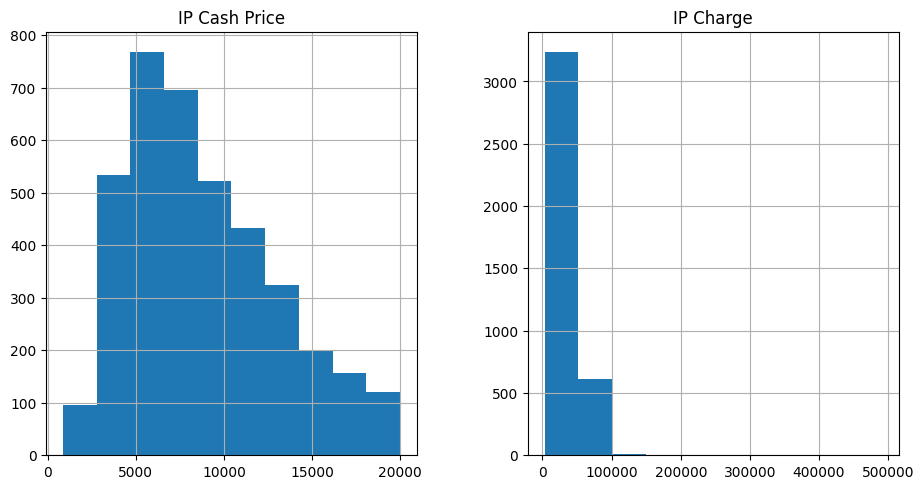

In [ ]:
data[['IP Cash Price','IP Charge']].hist(figsize=(11,5.5))

array([[<Axes: title={'center': 'IP Cash Price'}>,
        <Axes: title={'center': 'IP Charge'}>]], dtype=object)

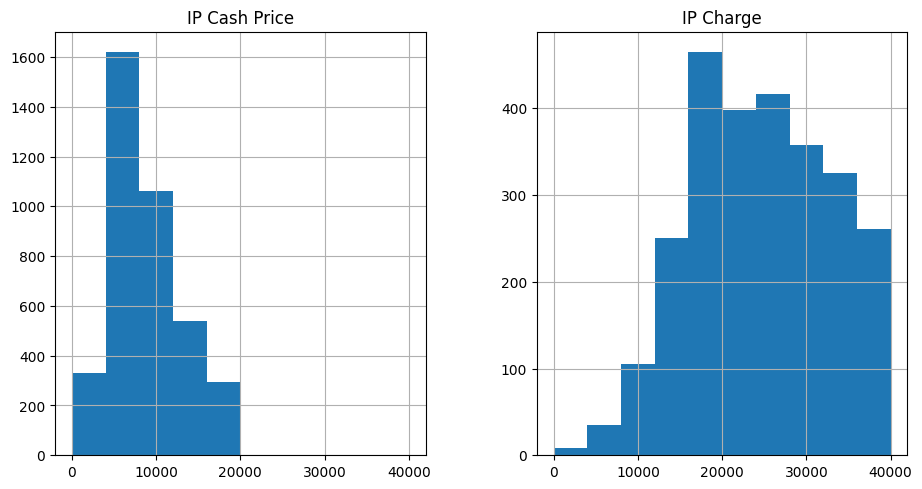

In [ ]:
data[['IP Cash Price','IP Charge']].hist(range=[0,40000], figsize=(11,5.5))

In [ ]:
high_cost_filter = data['IP Charge'] > 100000
data.loc[high_cost_filter]

,Location,Code Type,Code,NDC,Rev Code,Procedure,Procedure Description,Quantity,Payer,IP Charge,IP Expected Reimbursement,MIN_IP_XR,MAX_IP_XR,IP Cash Price,OP Charge,OP Expected Reimbursement,MIN_OP_XR,MAX_OP_XR,OP Cash Price
800,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ALLWELL [15100],120026.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
858,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ALLWELL [15100],102435.46,16684.09,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
934,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 461,NaN,NaN,MS461,Bilateral Or Multiple Major Joint Procedures O...,1,ALLWELL [15100],121126.29,NaN,8741.25,9225.00,NaN,0,NaN,NaN,NaN,NaN
1171,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 802,NaN,NaN,MS802,Other O.R. Procedures Of The Blood And Blood F...,1,ALLWELL [15100],143667.09,NaN,9725.00,10204.12,10204.12,0,NaN,NaN,NaN,NaN
1264,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 939,NaN,NaN,MS939,O.R. Procedures With Diagnoses Of Other Contac...,1,ALLWELL [15100],480809.48,NaN,7790.37,7790.37,7790.37,0,NaN,NaN,NaN,NaN
1945,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 037,NaN,NaN,MS037,Extracranial Procedures With McC,1,ARKANSAS TOTAL CARE [40700],123035.47,NaN,17816.08,39275.00,17816.08,0,NaN,NaN,NaN,NaN
2091,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 263,NaN,NaN,MS263,Vein Ligation And Stripping,1,ARKANSAS TOTAL CARE [40700],121981.89,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2138,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 333,NaN,NaN,MS333,Rectal Resection With Cc,1,ARKANSAS TOTAL CARE [40700],128929.41,NaN,12824.58,26704.23,15975.34,0,NaN,NaN,NaN,NaN
2149,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 344,NaN,NaN,MS344,Minor Small And Large Bowel Procedures With McC,1,ARKANSAS TOTAL CARE [40700],104304.46,NaN,16684.09,32536.01,17614.77,0,NaN,NaN,NaN,NaN
2192,BHMC LITTLE ROCK,DRG,MS-DRG V38 (FY 2021) 408,NaN,NaN,MS408,Biliary Tract Procedures Except Only Cholecyst...,1,ARKANSAS TOTAL CARE [40700],108898.78,NaN,19861.16,22240.28,19861.16,0,NaN,NaN,NaN,NaN


### Question:

**What do you observe from the histograms above?**

### YOUR RESPONSE:
From the first histogram
1. IP cash price with a range of 0 to 20000, where 100 observations are maintained till 2500 range and then increased the observation to 530 till 4000 range and then to maximum 780 between 4000 - 7000 range. There after the spike gradually decreased between 150 - 50 observations for every 250 range
2. IP charge with a range of 500000, observations are at peak 3500 between 0 - 50000 range and then dropped to 600 observation from 50000 - 100000 and a very low set of observation approx. less than 10 till 500000

From the second histogram, the range of 0 to 40000 for both IP cash price and IP change where it focuses more details observations till 40000 range when compare to first histogram
1. IP cash price - though the range is from 0 to 40000, IP cash price has a max range of data till 20000 and max observation are between 4000 - 7000 and then count decreased gradually and ended at 280 at 20000 range. As the range increase more the the range of IP cash price the histogram data has less detailed clarity.
2. IP charge - the histogram has more detailed observation from 0 to 40000 range where most of the observation or count available with in that range.

The difference between both the IP cash price histograms is if the histogram range is more than actual data range then the data has less clarity, so to get more visible data observations its good to use less range or exact range to get more detailed graph

The difference between both the IP charge histograms is if the histogram range is less than actual data range, then the data has more clarity where the observations is mostly within the 100000 range.

---

### 41.2 Plotting a KDE instead

Instead of a historgam, let's plot overlapping [KDEs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html).

(0.0, 40000.0)

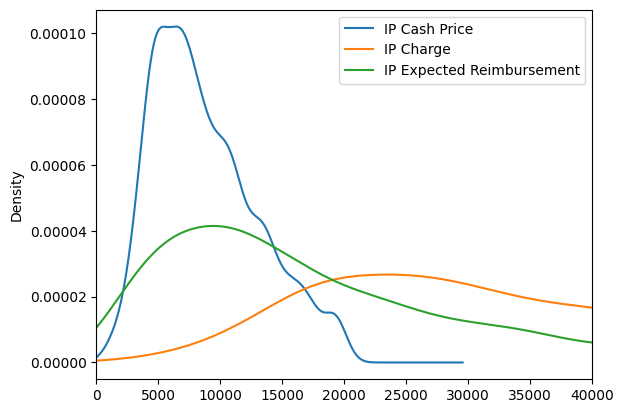

In [ ]:

graph = data[['IP Cash Price','IP Charge','IP Expected Reimbursement']].plot.kde()
graph.set_xlim(0, 40000)

### Question:

If I told you what these values represent, what conclusions could you draw about the pattern?
* IP Cash Price is the amount you would pay on your own without using insurance
* IP Charge is the maximum amount for which the hospital says it can submit a bill to an insurance company
* IP Expected Reimbursement is the amount that the hospital believes it is contracted to receive in payment from an insurance company

### YOUR RESPONSE:

Patients would like to pay on their own without using insurance till a range of 29000 and where the data shows huge number of patients paid amount between 4000 - 10000 and decreased gradually as the amount increases. The reason noticed is the hospitals are not offering much to submit a bill to an insurance company(IP Charge) if the amount is less than 10000.

As they believe the payment from an insurance company(IP expected Reimbursement) within the range will be reimbursed as per the contract but not much if the amount increases.

Hospitals are offering to submit bill to insurance as the amount range increases but where the reimbursed received from insurance is less than the amount submitted.

---

### 41.3 Creating a new set of series

In order to understand how this data varies across different payers, we have to create new data series that are based on the payer information.  In the data, we have a column called **Payer** that holds this information.

We can use the Pandas [groupby()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) function to create groupings based on Payer and then plot kde based on those groupings.  When [plotting a Pandas groupby result](https://pandas.pydata.org/pandas-docs/version/0.16.2/generated/pandas.core.groupby.DataFrameGroupBy.plot.html), the options are different than plotting a dataframe.

In [ ]:
data['Payer'].value_counts()

ALLWELL [15100]                      650
ARKANSAS TOTAL CARE [40700]          650
AETNA [65000]                        641
AR BLUE CROSS BLUE SHIELD [25001]    641
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: Payer, dtype: int64

In [ ]:
data.groupby(['Payer'])['IP Expected Reimbursement'].count()

Payer
AETNA [65000]                        372
ALLWELL [15100]                      519
AR BLUE CROSS BLUE SHIELD [25001]    450
ARKANSAS TOTAL CARE [40700]          404
HEALTHSCOPE [95700]                  641
MULTIPLAN                            641
Name: IP Expected Reimbursement, dtype: int64

Payer
AETNA [65000]                        Axes(0.125,0.11;0.775x0.77)
ALLWELL [15100]                      Axes(0.125,0.11;0.775x0.77)
AR BLUE CROSS BLUE SHIELD [25001]    Axes(0.125,0.11;0.775x0.77)
ARKANSAS TOTAL CARE [40700]          Axes(0.125,0.11;0.775x0.77)
HEALTHSCOPE [95700]                  Axes(0.125,0.11;0.775x0.77)
MULTIPLAN                            Axes(0.125,0.11;0.775x0.77)
Name: IP Expected Reimbursement, dtype: object

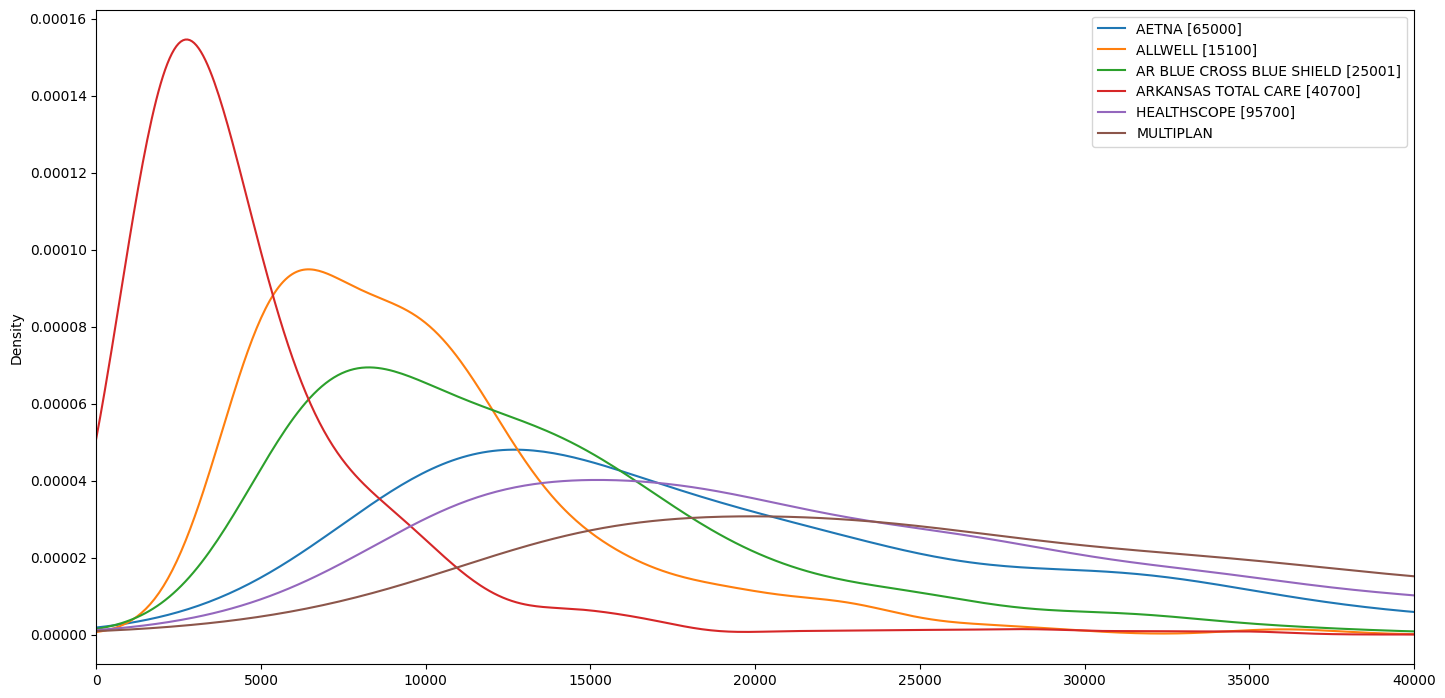

In [ ]:
data.groupby(['Payer'])['IP Expected Reimbursement'].plot.kde(
    xlim=(0,40000),
    legend=True,
    figsize=(17,8.5)
)


### Question:

Remember what this KDE represents. The x-axis is the price being reimbursement for a particular service and the y-axis represents how many different records in the input fall into that price range.  So, the higher the line at any particular x value, the more records are there.

If the line is higher the further left you go, that means most prices are lower.  If the peak of the line is more the the right, then the typical price is higher.

* What do you observe about the patterns in reimbursement above?
* What does that tell you about these particular plans?


### YOUR RESPONSE:


- Arkansas total care[40700] insurance company issues reimburse more for amount between 2000 - 4000 and drastically reduces the reimburse if the amount increases more than 10000.
- Allwell[15100] majorly issues reimburse for amount 4000 - 13000 and reduces the count till 25000. Compare to above company it reimburse more if the amount is greater than 6000 and less below that and less below it.
- AR Blue Cross blue shield [25001] issues more reimburse for amount 4000 - 20000 and less reimbursements above that. Comparing to above two companies reimbursements is more for amount more than 17000
- Aetna[65000] issues more reimbursements for amount between 10000 -20000 and  issues few till 40000. Comparing to  AR Blue Cross blue shield [25001], atena does more reimbursements for amount greater than 17000 and less below that.
- Health scope[95700] does reimburse less than Aetna till amount 17000 and issues more above that.
- Multiplan does reimburse very less compare to all the above insurance companies till the amount 12000 and increases issuing more till amount 40000 and its more compare to all other insurance offerings


Arkansas total care[40700], Allwell[15100] and Allwell[15100] issues more reimbursements of the amount is less than 10000. Aetna[65000] and Health scope[95700] majorly issues reimbursements between 10000 - 20000 and less more than it. Finally Multiplan does maintains an average reimbursements at all amounts and does better reimbursements comparing to all other if the amount is more than 25000.

Health scope and Multiplan has the highest number of reimbursements as per the grouping

---

### 41.4 Seeing if there's any correlation

So, we know that there are cash prices and insurance paid prices.  How strongly correlated are those amounts?

We can use a scatterplot with one value on the x axis and the other on the y axis to do a simple visualization of this.

<Axes: xlabel='IP Charge', ylabel='IP Expected Reimbursement'>

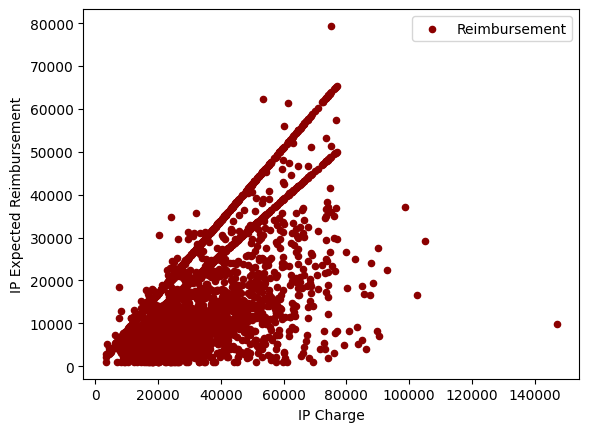

In [ ]:
data.plot.scatter(x='IP Charge', y='IP Expected Reimbursement', color='DarkRed', label='Reimbursement')

/var/folders/y_/xxx3y_g51lq6y2lhcry0dznc0000gn/T/ipykernel_83068/4001846673.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, (payer, prices) in enumerate(groups):


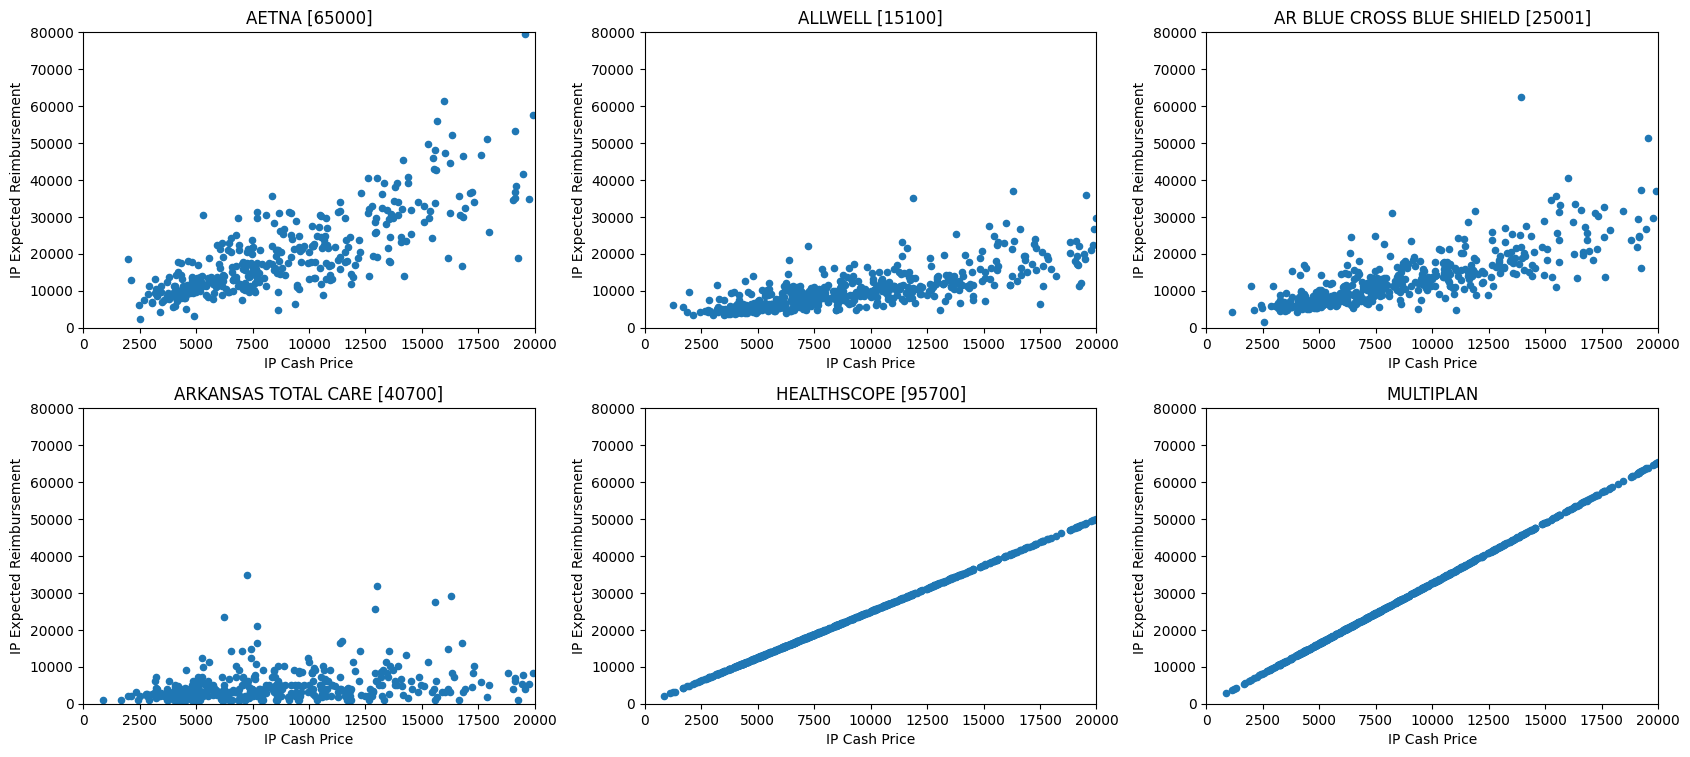

In [ ]:
groups = data.groupby(['Payer'])
plt.figure(figsize=(17,11))

for i, (payer, prices) in enumerate(groups):
    ax = plt.subplot(3,3, i+1)
    prices.plot.scatter(x='IP Cash Price',y='IP Expected Reimbursement',ax=ax)
    ax.set_title(payer)
    ax.set_xlim(0,20000)
    ax.set_ylim(0,80000)

plt.tight_layout()
plt.show()

### YOUR RESPONSE:

Scatter plot shows the relation plot between IP change and IP expected reimbursment. Reimbursement is being issued more if the bill submitted by hospitals is less than 60000 and amount issues by insurance is 25000 or less for it. Different insurance companies have different relation plot where hospitals submitting bill till the range of 60000 is more and same with the reimbursements. Bills above 60000 - 100000 are very less and same as the reimbursements.


- Healthscope and Multiplan shows amount paid by the patient and  expected insurance reimbursement are linearly dependent on each other. For example patients pay an amount of 5000 and can expect 10000 as reimbursement for the total bill. Multiplan has a better relation between the amounts compare to Healthscope
- Arkansas total Care reimburse 90% below 10000 amount and where patients do pay more amount as insurance is not much above 10000. The amount is poorly correlated between both.
- patients payment and  Aetna reimburse are scattered across all ranges but strong relation at 20000:10000 ration
- patients payment and Allwell reimbursement relation are more at 15000:20000
- patients payment and AR Blue Cross Blue Shield reimbursement relation are more at 12500:20000 and no relation for the reimbursement amount above 20000



---

### 41.5 Find Something of Your Own

What data are you interested in?  To earn full credit this week, you'll need to do the following:
1. Bring in some other data that you're interested in visualizing.  You can upload the file to your project directory and work with it here.
2. Read that data in using Pandas
3. Produce at least two different visualizations of that data
4. Write a paragraph that describes your observations of the trends in that data

If you're struggling to find data to use, feel free to reach out to me.  I can make some recommendations on data sets with interesting trends in them.

[Here is a helpful reference for plotting in Pandas.](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

# why this dataset was selected -
dataset will be useful to analyse the infant mortality rate based on gender across 11 years from 230 countries. Based on this data and reports it will be helpful to find which countries have the highest infant deaths so additional measures can be taken to control it.


#Loading and viewing the data
### https://www.kaggle.com/datasets/komalkhetlani/infant-mortality?rvi=1 Here is the link  for the dataset in kaggle (as per prof.Paul boal's advice mentioning the link to the page)

In [3]:
from google.colab import files
data = files.upload()

Saving InfantMortalityRate.csv to InfantMortalityRate (1).csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

###https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte referred to this for encoding the file.

In [5]:
file = pd.read_csv("InfantMortalityRate.csv", encoding='latin-1')
file

,Country,Infant Mortality Rate,Gender,Year
0,Afghanistan,43.050731,Female,2019
1,Angola,44.851045,Female,2019
2,Albania,7.659442,Female,2019
3,Andorra,2.555451,Female,2019
4,United Arab Emirates,5.716825,Female,2019
...,...,...,...,...
7618,Samoa,16.894304,Total,2009
7619,Yemen,44.940469,Total,2009
7620,South Africa,36.460146,Total,2009
7621,Zambia,54.130195,Total,2009


In [6]:
file.shape

(7623, 4)

In [7]:
file.columns

Index(['Country', 'Infant Mortality Rate', 'Gender', 'Year'], dtype='object')

In [8]:
file.head()

,Country,Infant Mortality Rate,Gender,Year
0,Afghanistan,43.050731,Female,2019
1,Angola,44.851045,Female,2019
2,Albania,7.659442,Female,2019
3,Andorra,2.555451,Female,2019
4,United Arab Emirates,5.716825,Female,2019


In [9]:
file.dtypes

Country                   object
Infant Mortality Rate    float64
Gender                    object
Year                       int64
dtype: object

#Histograms

<Axes: >

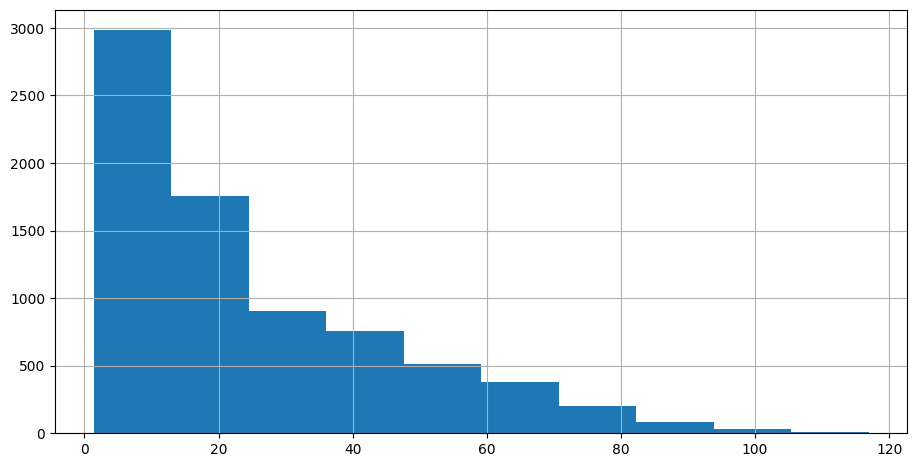

In [ ]:
file['Infant Mortality Rate'].hist(figsize=(11,5.5))

<Axes: >

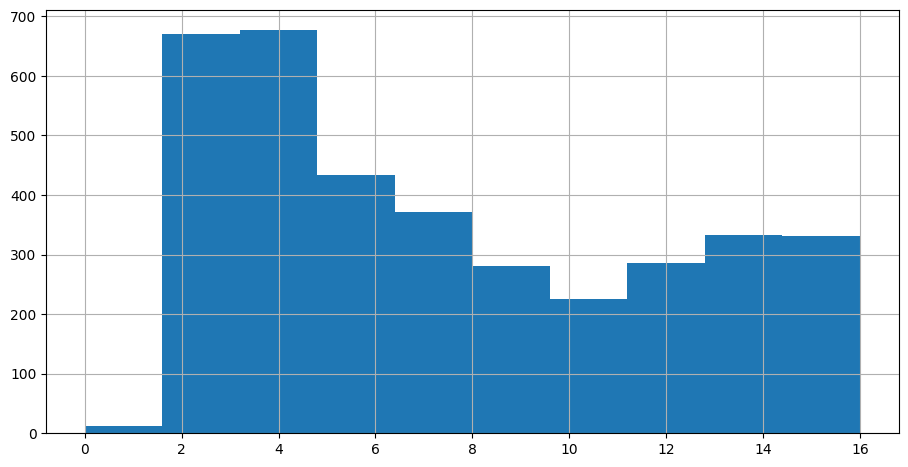

In [ ]:
file['Infant Mortality Rate'].hist(range=[0,16],figsize=(11,5.5))


### Observations #1

Histogram for Infant mortality rate ranging till 120 across variour countries. For infant mortality rate between 2 - 16 are over 3000 observations which are the highest and then its reduced by 40% from rate 16 - 24. The rate gradually decreased to 500 observations till 58 and less then 100 observations from 84 - 177 range.

As the count(3000) is more between the range 0 - 16, to get more detailed view the histogram using range function. This shows the maximum infant mortality rate is between 1.75 - 4.75 range.


#Plotting KDE

In [21]:
file['Country'].value_counts()

sub-Saharan Africa    66
North America         66
Afghanistan           33
El Salvador           33
Qatar                 33
                      ..
Iraq                  33
Iceland               33
Israel                33
Côte d'Ivoire         32
Côte dIvoire           1
Name: Country, Length: 230, dtype: int64

Year
2009    Axes(0.125,0.11;0.775x0.77)
2010    Axes(0.125,0.11;0.775x0.77)
2011    Axes(0.125,0.11;0.775x0.77)
2012    Axes(0.125,0.11;0.775x0.77)
2013    Axes(0.125,0.11;0.775x0.77)
2014    Axes(0.125,0.11;0.775x0.77)
2015    Axes(0.125,0.11;0.775x0.77)
2016    Axes(0.125,0.11;0.775x0.77)
2017    Axes(0.125,0.11;0.775x0.77)
2018    Axes(0.125,0.11;0.775x0.77)
2019    Axes(0.125,0.11;0.775x0.77)
Name: Infant Mortality Rate, dtype: object

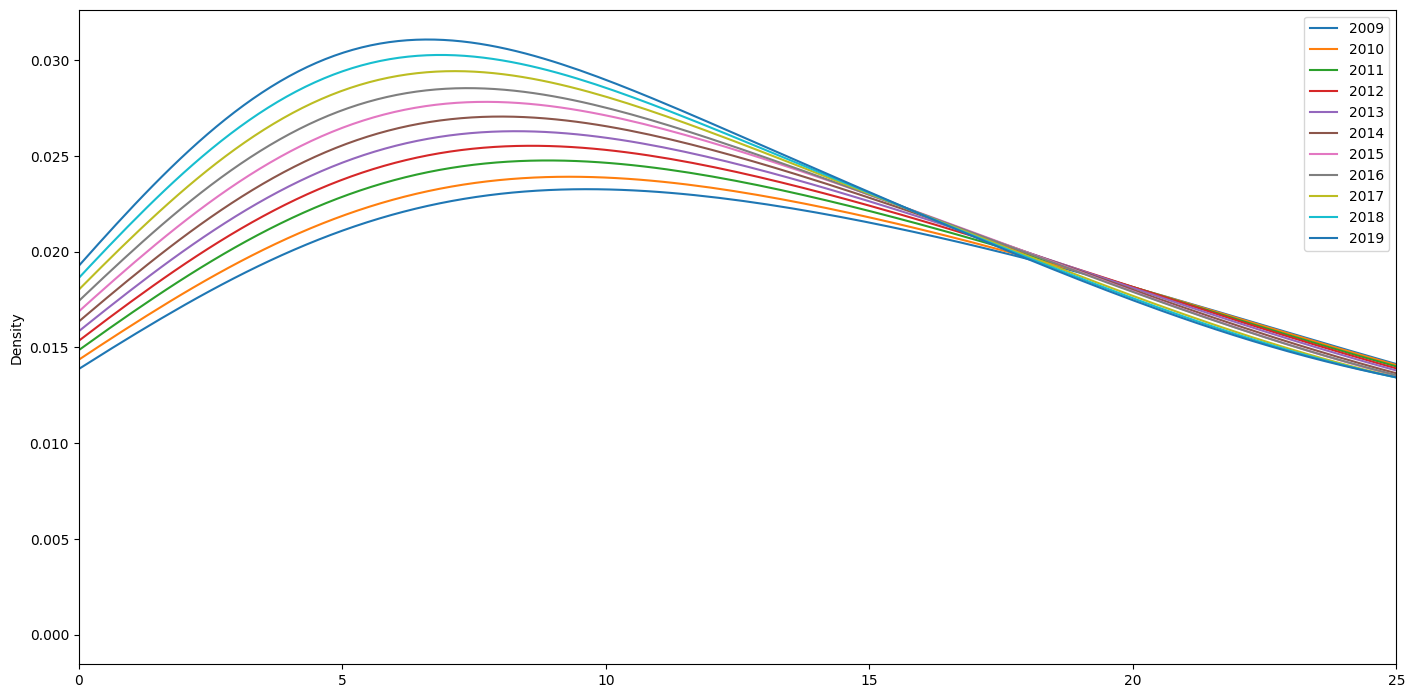

In [25]:
file.groupby(['Year'])['Infant Mortality Rate'].plot.kde(
    xlim=(0,25),
    legend=True,
    figsize=(17,8.5))

Year
2009    Axes(0.125,0.11;0.775x0.77)
2010    Axes(0.125,0.11;0.775x0.77)
2011    Axes(0.125,0.11;0.775x0.77)
2012    Axes(0.125,0.11;0.775x0.77)
2013    Axes(0.125,0.11;0.775x0.77)
2014    Axes(0.125,0.11;0.775x0.77)
2015    Axes(0.125,0.11;0.775x0.77)
2016    Axes(0.125,0.11;0.775x0.77)
2017    Axes(0.125,0.11;0.775x0.77)
2018    Axes(0.125,0.11;0.775x0.77)
2019    Axes(0.125,0.11;0.775x0.77)
Name: Infant Mortality Rate, dtype: object

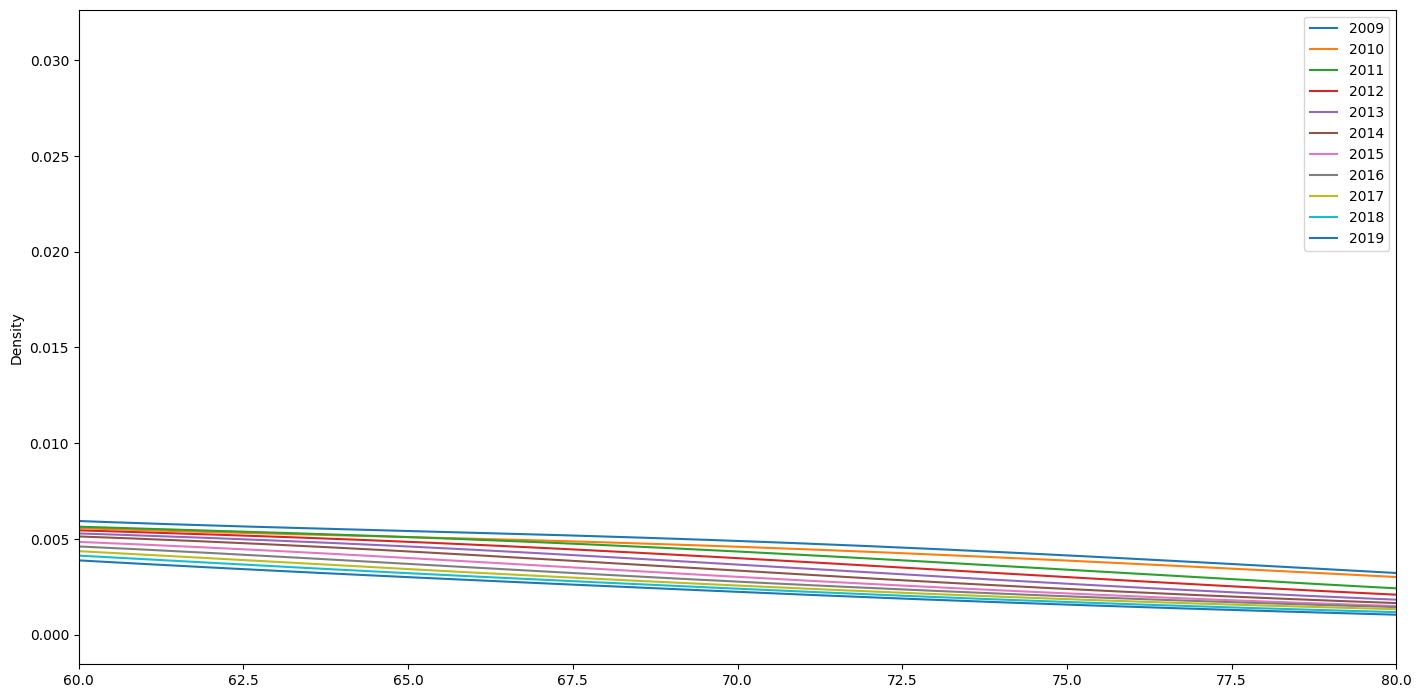

In [ ]:
file.groupby(['Year'])['Infant Mortality Rate'].plot.kde(
    xlim=(60,80),
    legend=True,
    figsize=(17,8.5))

### Observations #2
plot kde grouped by year for all infant mortality rate ranges and limited till range 25 for more detailed view as most of the difference in observation is during this range.

Infant Mortality rate is high between 5 - 15 range over the years(2009 - 2019), where 2009 has low mortality rate and it is increasing every year and 2019 has the highest.

Second plot kde is from range 60 - 80 range and the infant mortality rate is reduced compare to first plot and also can notice the graph is completely opposite as 2009 has the high rate and reduced till 2019



---



## Submitting Your Work

As usual, submit your work using the "Save to GitHub" option